# My DE solution

## Teoretical:

$y = x^4+c_1x^2$

$c_1 = \frac{y_0}{x_0^2} - x_0^2$

## Numerical:

### Euler's method
$y' = 2x^3 + 2\frac{y}{x}$

Truncation error for euler:

$T_i = \frac{h^2}{2}y''(x_i)$

In [68]:
import numpy as np              # math
import matplotlib.pyplot as plt # graphs
plt.style.use("default")        # important for IDE

In [78]:
class IVP:
    '''
        Class that represents specificly MY ivp
        It is separated due to the fact,
        that it would be possibly
        essential to emplement solutions of
        some other equations
    '''
    def __init__(self, x_0=1, y_0=2, x_max=10):
        '''
        (x_0, y_0) - coordinates of the inital value
        x_max - max x to approximate
        '''
        assert x_max > x_0, "x_0 is out of range"
        assert x_0 != 0, "x_0 is out of range"
        self.x_max = x_max
        self.x_0 = x_0
        self.y_0 = y_0
        self.y = self.__create_y_exact()
        self.undefined_x = [0] # list of dots that are forbidden for this function
    
    def check_x(self, x):
        '''
        x - array of input values
        Returns: True - x is appropriate
                 False - x is denied
        '''
        return (x not in self.undefined_x)

    def derivative(self, x, y):
        '''
        x, y - np.arrays/numbers to
        compute derivative of my function
        '''
        assert x!=0, "x is out of range"
        return 2*x**3 + 2*y/x

    def __create_y_exact(self):
        '''
        returns the exact solution of IVP 
        with constant substituted
        '''
        c_1 = self.y_0/(self.x_0)**2 - self.x_0**2
        return lambda x : x**4 + c_1*x**2
    


In [74]:
class IVP_plotter:
    def __init__(self):
        '''
        Class that plots the results of approximation
        for a given IVP (works with any of them)
        '''
        pass
    
    def __compute_euler(self, x, ivp):
        '''
        For a given ivp of class IVP computes the approximation 
        of the solution by Euler's method 
        on a given set of inputs (x)
        '''
        assert len(x) > 1, "Not enought data to approximate on"
        y = x.copy() # create array of the same length
        y[0] = ivp.derivative(ivp.x_0, ivp.y_0)
        for i in range(1, len(x)):
            y[i] = y[i-1] + (x[1] - x[0]) * ivp.derivative(x[i-1], y[i-1])
        return y

    def __compute_improved_euler(self, x, ivp):
        '''
        For a given ivp of class IVP computes the approximation 
        of the solution by Inptoved Euler's method 
        on a given set of inputs (x)
        '''
        assert len(x) > 1, "Not enought data to approximate on"
        y = x.copy() # create array of the same length
        h = x[1] - x[0] # step length
        y[0] = ivp.derivative(ivp.x_0, ivp.y_0)
        for i in range(1, len(x)):
            adder = ivp.derivative(x[i], y[i-1]+h*ivp.derivative(x[i-1], y[i-1]))
            y[i] = y[i-1] + h / 2 * (ivp.derivative(x[i-1], y[i-1]) + adder)
        return y

    def __compute_runge_kutta(self, x, ivp):
        '''
        For a given ivp of class IVP computes the approximation 
        of the solution by Runge Kutta's method 
        on a given set of inputs (x)
        '''
        assert len(x) > 1, "Not enought data to approximate on"

        y = x.copy() # create array of the same length
        h = x[1] - x[0] # step length
        y[0] = ivp.derivative(ivp.x_0, ivp.y_0)
        for i in range(1, len(x)):
            k1 = ivp.derivative(x[i-1], y[i-1])
            k2 = ivp.derivative(x[i-1]+h/2, y[i-1]+h/2*k1)
            k3 = ivp.derivative(x[i-1]+h/2, y[i-1]+h/2*k2)
            k4 = ivp.derivative(x[i-1]+h, y[i-1]+h*k3)
            y[i] = y[i-1] + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        return y

    def __plot_results(self, x, ys, title, subplot_index=1, axis_names=["x","y"]):
        '''
        Internal method that only plots 4 graphs

        x - x-axis values, length n
        ys - array with dimensionality (4, n)
        title - string that will be the eader og the plot
        subplot index - 0 if not required
                        in [1, 2, 3] if needed
        axis_names - names of the axis to be written
        '''
        assert len(ys)==4, "Incorrect dimensionality"
        assert subplot_index in range(4), "No such subplot supported"

        if subplot_index > 0:   plt.subplot(130+subplot_index)

        plt.title(title)
        plt.xlabel(axis_names[0])
        plt.ylabel(axis_names[1])
        plt.plot(x, ys[0], 'k-', label="exact")
        plt.plot(x, ys[1], 'r--', label="euler")
        plt.plot(x, ys[2], 'b--', label="improved euler")
        plt.plot(x, ys[3], 'g--', label="rk")
        plt.legend()
        plt.grid()

    def __local(self, global_errors):
        '''
        For a given global_errors array 
        outputs the array of the local errors
        '''
        assert len(global_errors) > 2, "Not enought data to compute on"

        new_data = np.append(np.array([0]), global_errors)
        difference = np.append(np.array([0, 0]), global_errors[:-1])
        return (new_data-difference)[1:]

    def plot_ivp(self, ivp, N=100):
        '''
        Outputs the matplotpib.pyplot figure
        with 3 subplots:
            - resulted approximation of the given IVP
            - global errors from x
            - local errors from x
        N - length of the array of x
        '''
        x = np.linspace(ivp.x_0, ivp.x_max, N)
        f = plt.figure(figsize=(30, 10))
        # computations
        approximations = [  ivp.y(x),
                            self.__compute_euler(x, ivp), 
                            self.__compute_improved_euler(x, ivp), 
                            self.__compute_runge_kutta(x, ivp)]
       
        global_errors = [approximations[0]-appr for appr in approximations]
        local_errors = [self.__local(glob) for glob in global_errors]
        # plotting    
        self.__plot_results(x, approximations, "Approximations of the IVP", 1)
        self.__plot_results(x, global_errors, "Global errors", 2)
        self.__plot_results(x, local_errors, "Local errors", 3)
        return f


    def __get_global_error(self, N, ivp, approximation):
        '''
        N - length of the x array
        ivp - the problem to solve
        approximation - function that takes x and ivp and returns array of x's dimensionality
        '''
        x = np.linspace(ivp.x_0, ivp.x_max, N)
        diff = approximation(x, ivp)[-1] - ivp.y(x)[-1]
        return diff

    def __get_error_array(self, Ns, ivp, function):
        '''
        Ns - length of x to be checked
        ivp - initial value proble to solve
        function -  function that takes x and ivp and returns array of x's dimensionality 
                    (appoximation)

        Returns the array of the last errors for all n
        '''
        error = [self.__get_global_error(int(n), ivp, function) for n in Ns]
        return error

    def plot_global_errors_analysis(self, ivp, n_min=100, n_max=1000, n_length=100):
        '''
        ivp - inital value problem to solve
        n_min - min length of x's array
        n_max - max length of x's array
        n_length - amount of n to check within given bounds
        '''
        assert n_max > n_min, "n_min is out of range"
        assert n_length > 0, "n_length should be positive integer"
        f = plt.figure(figsize=(10, 10))
        # computation
        Ns = np.linspace(n_min, n_max, n_length)
        ys = [  np.zero(len(Ns)),
                self.__get_error_array(Ns, ivp, self.__compute_euler),
                self.__get_error_array(Ns, ivp, self.__compute_improved_euler),
                self.__get_error_array(Ns, ivp, self.__compute_runge_kutta)]
        # plotting
        self.__plot_results(Ns, ys, "Methods' max global errors", 0, ["N", "error"])
        return f
    

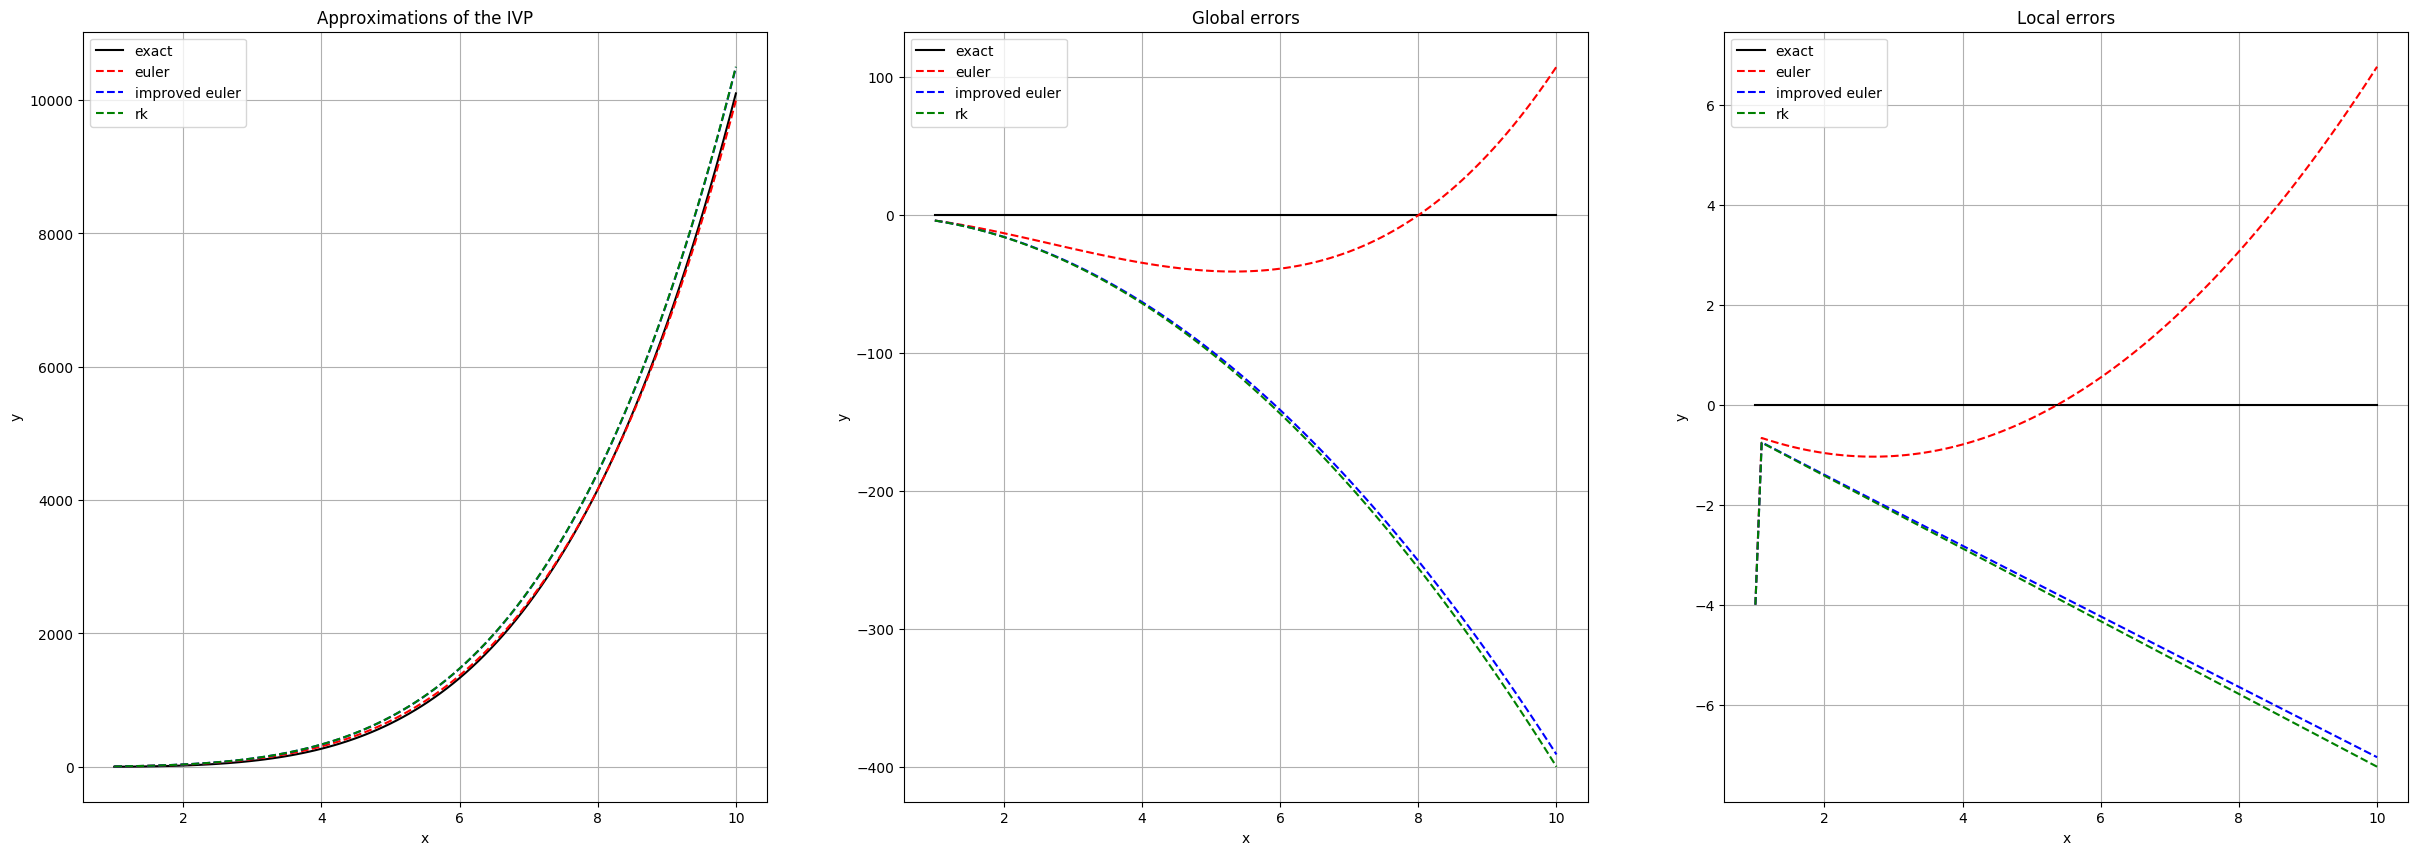

In [75]:
ivp = IVP(1, 2, 10)
computer = IVP_computer()
f2 = computer.plot_ivp(ivp)

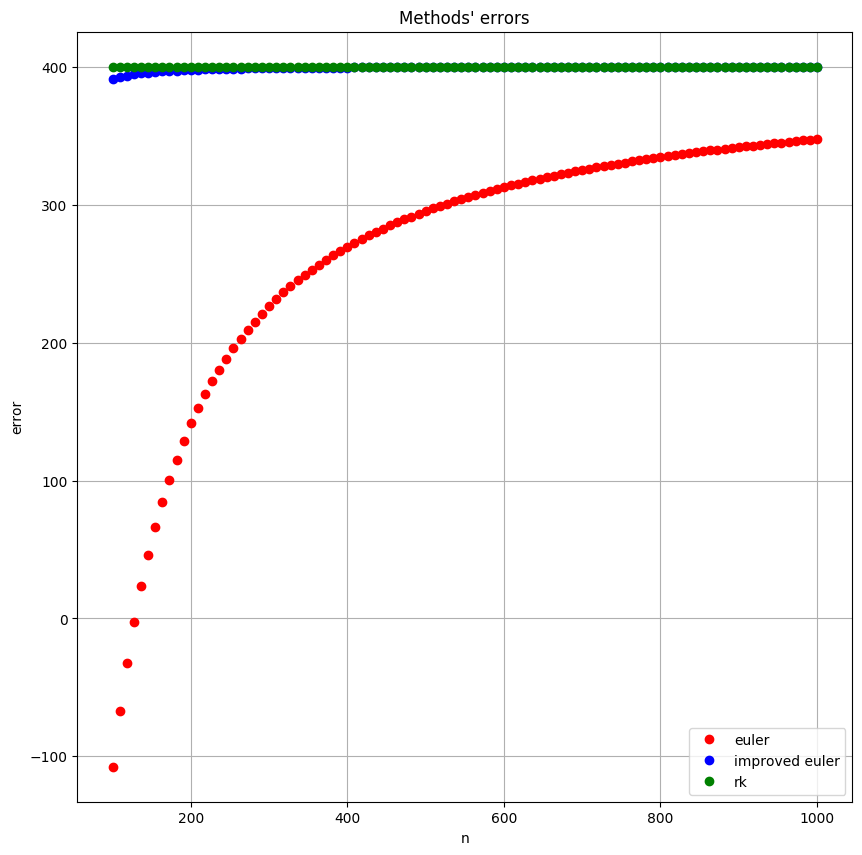

In [76]:
f = computer.plot_global_errors_analysis(ivp)